In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder
import category_encoders as ce 
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import os
import copy
import math
from matplotlib.ticker import ScalarFormatter

In [2]:
df = pd.read_csv(r'D:\Data Science\Files\kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Data Cleaning

## Price 

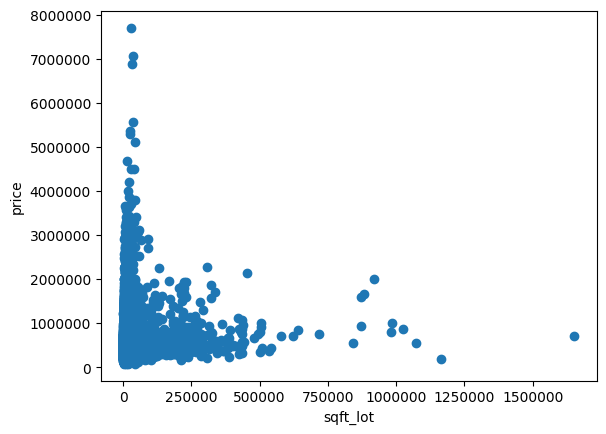

In [4]:
plt.scatter(df['sqft_lot'], df['price'])
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.ticklabel_format(style='plain', useOffset=False)

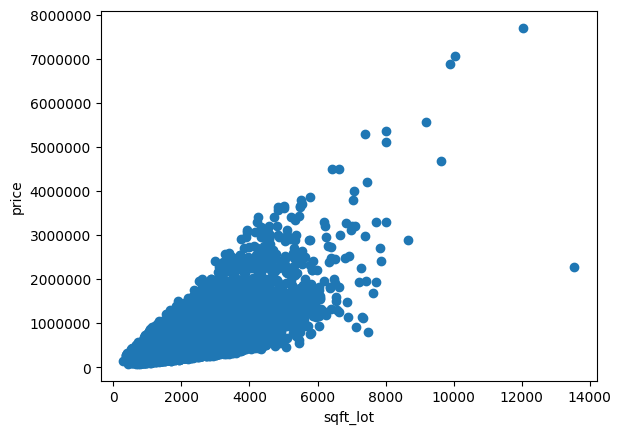

In [5]:
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.ticklabel_format(style='plain', useOffset=False)

In [6]:
df['sqft_lot'].max()

1651359

In [7]:
df['price'].max()

7700000.0

In [8]:
# df['price'] = np.log1p(df['price'])
# df['price'].value_counts()

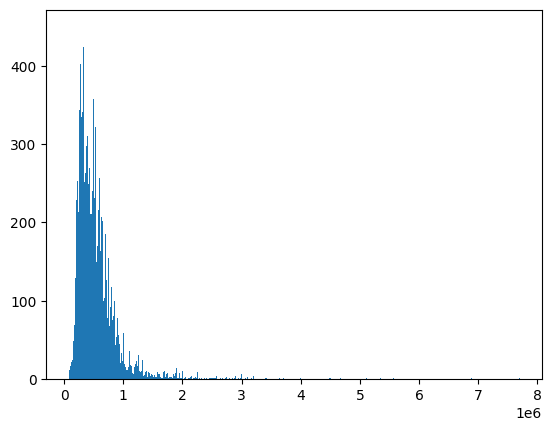

In [9]:
plt.hist(df['price'], bins=1000);

## Price

In [10]:
df['price'] = df['price'].astype(int)

## Bedrooms

In [11]:
df['bedrooms'].describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [12]:
df[df['bedrooms'] > 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,20140821T000000,520000,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15870,2402100895,20140625T000000,640000,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [47]:
df[(df['bedrooms']==0) & (df['bathrooms']==0)] #should drop these

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
875,6306400140,20140612T000000,1095000,0,0.0,3064,4764,3,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3119,3918400017,20150205T000000,380000,0,0.0,1470,979,3,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6994,2954400190,20140624T000000,1295650,0,0.0,4810,28008,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9773,3374500520,20150429T000000,355000,0,0.0,2460,8049,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9854,7849202190,20141223T000000,235000,0,0.0,1470,4800,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14423,9543000205,20150413T000000,139950,0,0.0,844,4269,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19452,3980300371,20140926T000000,142000,0,0.0,290,20875,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Bathrooms

In [13]:
df['bathrooms'].describe()

count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [14]:
df[df['bathrooms']==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000,0,0.0,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,20150217T000000,75000,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,20150205T000000,380000,0,0.0,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,5702500050,20141104T000000,280000,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,20140624T000000,1295650,0,0.0,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,20150429T000000,355000,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000,0,0.0,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,203100435,20140918T000000,484000,1,0.0,690,23244,1.0,0,0,...,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,9543000205,20150413T000000,139950,0,0.0,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,3980300371,20140926T000000,142000,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [15]:
df[df['bathrooms'] > 6]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4024,9175600025,20141007T000000,800000,7,6.75,7480,41664,2.0,0,2,...,11,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190
7252,6762700020,20141013T000000,7700000,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8092,1924059029,20140617T000000,4668000,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
8546,424049043,20140811T000000,450000,9,7.50,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
9254,9208900037,20140919T000000,6885000,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
12777,1225069038,20140505T000000,2280000,7,8.00,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
14556,2303900035,20140611T000000,2888000,5,6.25,8670,64033,2.0,0,4,...,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
18302,6072800246,20140702T000000,3300000,5,6.25,8020,21738,2.0,0,0,...,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969
20578,424069279,20150328T000000,1180000,6,6.50,6260,10955,2.0,0,0,...,11,4840,1420,2007,0,98075,47.5947,-122.039,2710,12550
21506,2524069097,20140509T000000,2238890,5,6.50,7270,130017,2.0,0,0,...,12,6420,850,2010,0,98027,47.5371,-121.982,1800,44890


## Floors

In [16]:
df['floors'] = df['floors'].astype(int)

In [17]:
df['floors'].value_counts()

floors
1    12590
2     8402
3      621
Name: count, dtype: int64

# Feature Engineering

# Age Built

In [18]:
df['age'] = datetime.datetime.now().year - df['yr_built']
df['age']

0        69
1        73
2        91
3        59
4        37
         ..
21608    15
21609    10
21610    15
21611    20
21612    16
Name: age, Length: 21613, dtype: int64

## Age renovated

In [19]:
df['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [20]:
df['renovated_age'] = datetime.datetime.now().year - df['yr_renovated']
df['renovated_age'] = np.where((df['yr_renovated']==0), df['age'], df['renovated_age'])
df['renovated_age'].value_counts()

renovated_age
10     650
19     485
18     478
20     459
21     457
      ... 
123     28
122     25
91      23
89      19
90      14
Name: count, Length: 116, dtype: int64

## Remodeled or not

In [21]:
df['remodeled'] = np.where(df['yr_renovated']==0, 0, 1)
df['remodeled'].value_counts()

remodeled
0    20699
1      914
Name: count, dtype: int64

## Basement or not

In [22]:
df['basement'] = np.where(df['sqft_basement']==0, 0, 1)
df['basement'].value_counts()

basement
0    13126
1     8487
Name: count, dtype: int64

# Encoding / Scaling

## Types of features

Ordinal
-------------
view
condition
grade


Nominal 
-------------
waterfront
zipcode



Continuous
-------------
bedrooms
bathrooms
sqft_living
sqft_lot
floors
sqft_above
sqft_basement
lat
long
sqft_living15
sqft_lot15
yr_built
yr_renovated
age
renovated_age


## Encoding

In [23]:
# ord_feats = df[['view', 'condition', 'grade']]
# ord = OrdinalEncoder()
# ord.fit(ord_feats)
# ord_feats_encoded = ord.transform(ord_feats)
# new_ord_feats = pd.DataFrame(ord_feats_encoded, columns=ord_feats.columns)
# new_ord_feats


In [24]:
# df.drop(columns=ord_feats, inplace=True)
# df = df.merge(new_ord_feats, left_index=True, right_index=True)
# df

In [25]:
nom_feats = df[['zipcode']]
oe = OneHotEncoder()
oe.fit(nom_feats)
nom_feats_encoded = oe.transform(nom_feats).toarray()
new_nom_feats = pd.DataFrame(nom_feats_encoded, columns=oe.get_feature_names_out(['zipcode']))
new_nom_feats

,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df.drop(columns=nom_feats, inplace=True)
df = df.merge(new_nom_feats, left_index=True, right_index=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.get_dummies(df) #convert zipcode into object

## Scaling

In [27]:
# cont_feats = df[[
# 'bedrooms',
# 'bathrooms',
# 'sqft_living',
# 'sqft_lot',
# 'floors',
# 'sqft_above',
# 'sqft_basement',
# 'zipcode',
# 'lat',
# 'long',
# 'sqft_living15',
# 'sqft_lot15',
# 'age',
# 'renovated_age'
# ]]
# min = MinMaxScaler()
# min.fit(cont_feats)
# cont_feats_scaled = min.transform(cont_feats)
# new_cont_feats = pd.DataFrame(cont_feats_scaled, columns=cont_feats.columns)
# new_cont_feats

In [28]:
# df.drop(columns=cont_feats, inplace=True)
# df = df.merge(new_cont_feats, left_index=True, right_index=True)
# df

# Feature Selection

In [29]:
y = df['price']
x = df.drop(columns=['id', 'date', 'price', 'lat', 'long'])

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [31]:
ytrain.max()

7700000

In [32]:
lr_model = LinearRegression().fit(xtrain, ytrain)
lr_model.coef_

array([-2.74863579e+04,  2.19639750e+04,  1.36395922e+12,  2.63967473e-01,
       -4.37599833e+04,  6.83536931e+05,  5.48336369e+04,  2.56624289e+04,
        5.63378075e+04, -1.36395921e+12, -1.36395921e+12, -3.66720660e+09,
        3.28040551e+03,  1.15845606e+01, -2.05780754e-01, -3.66720651e+09,
        5.51090475e+02, -6.48156544e+06, -2.37642040e+04, -1.08426725e+07,
       -1.08215068e+07, -1.08544450e+07, -1.00735584e+07, -1.05398072e+07,
       -1.05904043e+07, -1.06044563e+07, -1.05912229e+07, -1.07737549e+07,
       -1.07297146e+07, -1.07350249e+07, -1.07614227e+07, -1.08577605e+07,
       -1.08784085e+07, -1.06897227e+07, -1.06783088e+07, -1.07236700e+07,
       -1.06338670e+07, -1.08371885e+07, -1.08336603e+07, -1.08328004e+07,
       -1.04844243e+07, -1.06392440e+07, -1.08167304e+07, -9.55766397e+06,
       -1.03342841e+07, -1.08384502e+07, -1.07552701e+07, -1.06148772e+07,
       -1.06522206e+07, -1.07930487e+07, -1.07457167e+07, -1.08146093e+07,
       -1.07639736e+07, -

## Lasso

In [46]:
l = Lasso(alpha=60000)
l_model = l.fit(xtrain, ytrain)
l_model.coef_

array([-0.00000000e+00,  0.00000000e+00,  2.32261277e+02, -3.35386534e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.19171063e+03,  1.26639462e+01,  0.00000000e+00, -1.82066875e+03,
        4.16384056e+01,  9.15493858e+01,  5.52803158e+02,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -

In [45]:
len(xtrain.columns[np.where(l_model.coef_!=0)])

10

In [35]:
xtrain.columns[np.where(l_model.coef_!=0)]

Index(['sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'yr_built',
       'yr_renovated', 'sqft_living15', 'sqft_lot15', 'age', 'renovated_age'],
      dtype='object')

## Backward Stepwise Selection

In [36]:
p_total = len(xtrain.columns)
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

bestModelsForEachIteration = []
inputVariablesNames = list(xtrain.columns)
quantityOfInputVariables = len(inputVariablesNames)
removedRMSE = []
variable_lists = []

for iteration in range(quantityOfInputVariables):
    bestCurrentModel = None
    LowestCurrentRMSE = 1e8
    bestCurrentVariable = None
    # first step: no removed variables
    if iteration == 0:
        # fit model
        regr_model = OLS(ytrain, xtrain[inputVariablesNames]).fit()
        # predict
        l_preds=regr_model.predict(xtest[inputVariablesNames])
        #evaluate our model's performance using root of mean squared error
        mse=mean_squared_error(ytest,l_preds)
        rmse=math.sqrt(mse)
        # assign lowest aic_value and corresponding model and variables
        if rmse <= LowestCurrentRMSE:
            bestCurrentModel = regr_model
            bestCurrentVariable = None
            LowestCurrentRMSE = rmse
    # if not first step, remove one variable
    else:
        for inputVariableName in inputVariablesNames:
            copyVariables = copy.deepcopy(inputVariablesNames)
            copyVariables.remove(inputVariableName)
            # fit model
            regr_model = OLS(ytrain, xtrain[copyVariables]).fit()
            # predict
            l_preds=regr_model.predict(xtest[copyVariables])
            #evaluate our model's performance using mean squared error
            mse=mean_squared_error(ytest,l_preds)
            rmse=math.sqrt(mse)
            # assign lowest aic_value and corresponding model and variables
            if rmse <= LowestCurrentRMSE:
                bestCurrentModel = regr_model
                bestCurrentVariable = inputVariableName
                LowestCurrentRMSE = rmse
    # put the best parameters(aci,variables, model) into the corresponding list
    bestModelsForEachIteration.append(bestCurrentModel)
    removedRMSE.append(LowestCurrentRMSE)
    # if not first step, remove one variable
    if bestCurrentVariable:
        inputVariablesNames.remove(bestCurrentVariable)
        variable_list = copy.deepcopy(inputVariablesNames)
        variable_lists.append(variable_list)
    print('Iteration: ', iteration, 'Selected Variables: ', inputVariablesNames, 'Lowest RMSE:', removedRMSE)
# choose the lowest_aic_value model
bestmodel_index_backward = removedRMSE[-5:].index(min(removedRMSE[-5:]))
bestmodel_model_backward = bestModelsForEachIteration[-5:][bestmodel_index_backward]
bestmodel_variable_backward = variable_lists[-5:][bestmodel_index_backward]
print("bestmodel_index:", bestmodel_index_backward, "bestmodel_variables:",bestmodel_variable_backward)

Iteration:  0 Selected Variables:  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'age', 'renovated_age', 'remodeled', 'basement', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipc

Iteration:  1 Selected Variables:  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'age', 'renovated_age', 'remodeled', 'basement', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'z

# Train Test Split

In [30]:
df['price'] = np.log1p(df['price'])

In [31]:
# y = df['price']
# x = df[[
#     'sqft_living', 
#     'sqft_lot', 
#     'grade', 
#     'sqft_above', 
#     'yr_built',
#     'yr_renovated', 
#     'zipcode', 
#     'sqft_living15', 
#     'sqft_lot15', 
#     'age',
#     'renovated_age'
    
    
    
    
    
#     ]]

In [37]:
y = df['price']
x = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'age', 'remodeled', 'basement', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98106', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98116', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199'] ]

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=00)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((17290, 81), (17290,), (4323, 81), (4323,))

# Outliers

## price > 6000000

In [39]:
ytrain[ytrain > 6000000]

9254    6885000
3914    7062500
7252    7700000
Name: price, dtype: int32

In [40]:
ytrain.info()

<class 'pandas.core.series.Series'>
Index: 17290 entries, 5268 to 2732
Series name: price
Non-Null Count  Dtype
--------------  -----
17290 non-null  int32
dtypes: int32(1)
memory usage: 202.6 KB


In [41]:
ytrain.drop([9254, 3914, 7252], inplace=True)

In [37]:
ytrain.info()

<class 'pandas.core.series.Series'>
Index: 17287 entries, 5268 to 2732
Series name: price
Non-Null Count  Dtype  
--------------  -----  
17287 non-null  float64
dtypes: float64(1)
memory usage: 270.1 KB


In [36]:
ytrain[ytrain > 6000000]

Series([], Name: price, dtype: float64)

In [38]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17290 entries, 5268 to 2732
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       17290 non-null  int64  
 1   bathrooms      17290 non-null  float64
 2   sqft_living    17290 non-null  int64  
 3   sqft_lot       17290 non-null  int64  
 4   waterfront     17290 non-null  int64  
 5   view           17290 non-null  int64  
 6   condition      17290 non-null  int64  
 7   grade          17290 non-null  int64  
 8   sqft_basement  17290 non-null  int64  
 9   yr_renovated   17290 non-null  int64  
 10  zipcode        17290 non-null  int64  
 11  lat            17290 non-null  float64
 12  long           17290 non-null  float64
 13  sqft_living15  17290 non-null  int64  
 14  age            17290 non-null  int64  
 15  renovated_age  17290 non-null  int64  
 16  remodeled      17290 non-null  int32  
dtypes: float64(3), int32(1), int64(13)
memory usage: 2.3 

In [42]:
xtrain.drop([9254, 3914, 7252], inplace=True)

In [40]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17287 entries, 5268 to 2732
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       17287 non-null  int64  
 1   bathrooms      17287 non-null  float64
 2   sqft_living    17287 non-null  int64  
 3   sqft_lot       17287 non-null  int64  
 4   waterfront     17287 non-null  int64  
 5   view           17287 non-null  int64  
 6   condition      17287 non-null  int64  
 7   grade          17287 non-null  int64  
 8   sqft_basement  17287 non-null  int64  
 9   yr_renovated   17287 non-null  int64  
 10  zipcode        17287 non-null  int64  
 11  lat            17287 non-null  float64
 12  long           17287 non-null  float64
 13  sqft_living15  17287 non-null  int64  
 14  age            17287 non-null  int64  
 15  renovated_age  17287 non-null  int64  
 16  remodeled      17287 non-null  int32  
dtypes: float64(3), int32(1), int64(13)
memory usage: 2.3 

## sqft_living > 15000000

In [38]:
xtrain[xtrain['sqft_lot']> 1500000]

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,age,renovated_age,remodeled
1719,4,1.0,1300,1651359,0,3,4,6,0,0,98022,47.2313,-122.023,2560,104,104,0


In [43]:
xtrain.drop(1719, inplace=True)
ytrain.drop(1719, inplace=True)

In [40]:
ytrain

5268     13.112315
16909    13.361382
16123    12.854487
12181    12.854487
12617    13.415034
           ...    
13123    13.981026
19648    12.608202
9845     12.973866
10799    12.926351
2732     13.458694
Name: price, Length: 17286, dtype: float64

# Linear Regression

In [44]:
lr = LinearRegression()
lr_model = lr.fit(xtrain, ytrain)
pred_price = lr_model.predict(xtest)
pred_price = np.expm1(pred_price)
pred_price

C:\Users\rvuon\AppData\Local\Temp\ipykernel_17992\792561715.py:4: RuntimeWarning: overflow encountered in expm1
  pred_price = np.expm1(pred_price)


array([inf, inf, inf, ..., inf, inf, inf])

In [ ]:
ytrain = np.expm1(ytrain)
ytest = np.expm1(ytest)

In [42]:
print('TRAIN RMSE: ', mean_squared_error(ytrain,np.expm1(lr.predict(xtrain)))**0.5)
print('TEST RMSE: ', mean_squared_error(ytest, pred_price)**0.5)

TRAIN RMSE:  633278.4412151307
TEST RMSE:  603963.4788201498


In [43]:
# lr = LinearRegression()
# lr_model.fit(xtrain, ytrain)
# pred_price = lr_model.predict(xtest)
# pred_price = (pred_price)
# pred_price

In [44]:
# print('TRAIN RMSE: ', mean_squared_error(ytrain, (lr_model.predict(xtrain)))**0.5)
# print('TEST RMSE: ', mean_squared_error(ytest, pred_price)**0.5)

In [45]:
def inverse_transform(x, l):
    return (l * x + 1)**(1/l)